In [56]:
# Import library yang diperlukan
import cv2
import numpy as np
import os
from skimage.feature import graycomatrix, graycoprops
import pandas as pd 
import plotly.graph_objects as go
from umap import UMAP

# Pra proses

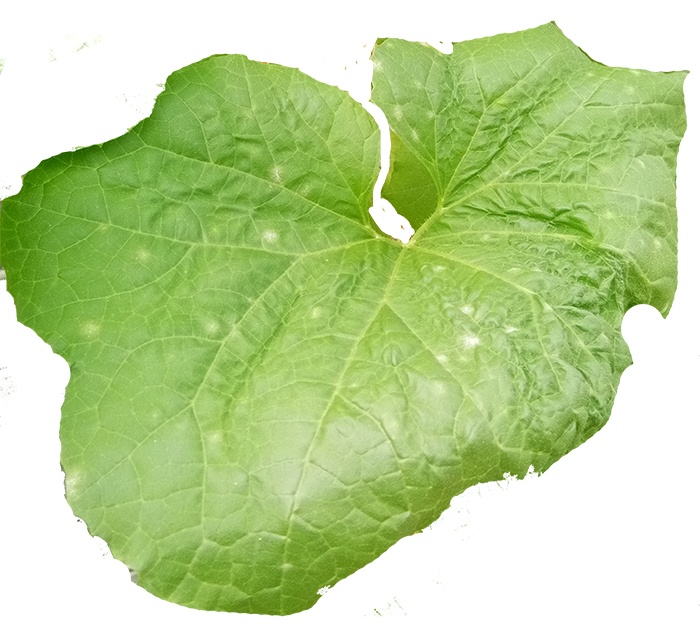

In [57]:
# Path ke folder yang berisi citra
# folder_path = './resize_mleaves/'
folder_path = './melon_leaves/'
image_files = os.listdir(folder_path)

from IPython.display import Image
Image(filename=folder_path+image_files[5]) 

In [58]:
imgs_matrix = [] #list image matrix 
imgs_label = [] #image path
for filename in image_files:
    image = cv2.imread(folder_path+filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    h, w = gray.shape
    ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
    crop = gray[ymin:ymax, xmin:xmax]

    resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)

    imgs_matrix.append(resize)
    imgs_label.append(filename)

In [59]:
# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
# what happen if there is some change in parameter GLCM?, distance=4? and levels, what commonly value used?
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    glcm = graycomatrix(
        img, 
        distances=dists, 
        angles=agls, 
        levels=lvl,
        symmetric=sym, 
        normed=norm
    )
    feature = []
    feature.append(label) #append label

    # append GLCM properties
    # glcm_props = []
    # for name in props:
    #     for property in graycoprops(glcm, name)[0]:
    #           glcm_props.append(property)
    # for item in glcm_props:
    #         feature.append(item)
    glcm_props = []
    for prop in props:
        from_graycoprops = graycoprops(glcm, prop) # shape array (1, 4)
        glcm_props.extend(from_graycoprops[0])
    feature.extend(glcm_props)

    
    return feature

In [60]:
# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img,label in zip(imgs_matrix, imgs_label): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, label, props=properties)
            )

In [61]:
# Create the pandas DataFrame for GLCM features data
# column
columns = []
columns.append("label") #label column
# GLCM column
angles = ['0', '45', '90','135']
for name in properties:
    for ang in angles:
        columns.append(name + "_" + ang)

# create dataframe
glcm_df = pd.DataFrame(glcm_all_agls, columns = columns)
glcm_df.head(15)

,label,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
0,IMG_20210223_102008.jpg,11.759985,12.386930,10.697676,11.049107,0.562211,0.516302,0.634666,0.599374,0.097536,...,202.051649,224.951355,0.000465,0.000442,0.000494,0.000490,0.021555,0.021020,0.022225,0.022140
1,IMG_20210223_102746.jpg,25.367631,26.545617,25.236239,26.407386,0.438536,0.396168,0.462586,0.418624,0.045465,...,1073.256327,1160.953653,0.000135,0.000133,0.000135,0.000132,0.011640,0.011545,0.011624,0.011478
2,IMG_20200224_132619.jpg,10.058777,10.047098,8.888728,9.450521,0.859320,0.857290,0.881880,0.873805,0.111699,...,155.951029,164.978497,0.000341,0.000341,0.000383,0.000365,0.018474,0.018477,0.019567,0.019114
3,IMG_20200224_132816.jpg,13.663305,13.756799,13.701417,14.549245,0.814280,0.815429,0.810086,0.789410,0.086131,...,344.399893,385.173970,0.000202,0.000199,0.000201,0.000195,0.014213,0.014115,0.014191,0.013981
4,IMG_20210329_13252995.jpg,11.986768,11.373381,10.551299,12.986818,0.671312,0.765703,0.820535,0.651022,0.152949,...,620.951165,1052.132979,0.001281,0.001475,0.001939,0.001235,0.035794,0.038402,0.044032,0.035145
5,IMG_20200224_132427.jpg,13.042920,12.756127,12.995988,13.236169,0.525257,0.606655,0.521821,0.454462,0.096431,...,365.669597,428.181548,0.000453,0.000464,0.000434,0.000426,0.021290,0.021540,0.020827,0.020646
6,IMG_20210223_101844.jpg,15.963035,13.460349,14.116848,16.651402,0.528070,0.664923,0.630116,0.504612,0.079184,...,404.977418,537.464958,0.000310,0.000344,0.000336,0.000304,0.017597,0.018552,0.018319,0.017439
7,IMG_20210329_132235.jpg,10.473267,10.085532,9.387535,10.364752,0.491316,0.521006,0.588318,0.498088,0.095314,...,148.981470,180.693689,0.000674,0.000701,0.000739,0.000690,0.025962,0.026472,0.027189,0.026259
8,IMG_20210223_102418.jpg,19.788698,19.675623,18.724138,19.338022,0.219314,0.214915,0.286746,0.243679,0.055539,...,589.275041,625.991324,0.000238,0.000241,0.000248,0.000243,0.015430,0.015536,0.015761,0.015586
9,IMG_20210223_102342.jpg,7.454678,7.129889,7.165241,6.962868,0.422424,0.466352,0.446057,0.475812,0.162166,...,111.014207,104.348356,0.001460,0.001499,0.001516,0.001551,0.038207,0.038723,0.038940,0.039384


In [62]:
glcm_df.shape

(160, 25)

# K-MEANS


In [63]:
X = glcm_df.drop(['label'], axis=1)
Y = glcm_df['label']

In [64]:
# UMAP reduction
# Reduce the dimensions of entity embeddings to represent them in a 2D plane.
X_scaled = UMAP().fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=['feature-vector-1','feature-vector-2'])

In [65]:
# Membuat scatter plot dengan Plotly
fig = go.Figure()

# Menambahkan scatter plot
fig.add_trace(
    go.Scatter(x=X_scaled['feature-vector-1'], y=X_scaled['feature-vector-2'], mode='markers', marker=dict(size=10))
)

# Menyamakan skala sumbu x dan y
fig.update_xaxes(scaleanchor="y")
fig.update_yaxes(scaleanchor="x")

# Menambahkan judul
fig.update_layout(title="Scatter Plot")

# Menampilkan plot
fig.show()
